# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [6]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.9        0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [7]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    print("instance",instance)
    predicted=clf_knn.predict(instance)[0]
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
instance [[5.1 3.5 1.4 0.2]]
0 ok setosa
instance [[4.9 3.  1.4 0.2]]
1 ok setosa
instance [[4.7 3.2 1.3 0.2]]
2 ok setosa
instance [[4.6 3.1 1.5 0.2]]
3 ok setosa
instance [[5.  3.6 1.4 0.2]]
4 ok setosa
instance [[5.4 3.9 1.7 0.4]]
5 ok setosa
instance [[4.6 3.4 1.4 0.3]]
6 ok setosa
instance [[5.  3.4 1.5 0.2]]
7 ok setosa
instance [[4.4 2.9 1.4 0.2]]
8 ok setosa
instance [[4.9 3.1 1.5 0.1]]
9 ok setosa
instance [[5.4 3.7 1.5 0.2]]
10 ok setosa
instance [[4.8 3.4 1.6 0.2]]
11 ok setosa
instance [[4.8 3.  1.4 0.1]]
12 ok setosa
instance [[4.3 3.  1.1 0.1]]
13 ok setosa
instance [[5.8 4.  1.2 0.2]]
14 ok setosa
instance [[5.7 4.4 1.5 0.4]]
15 ok setosa
instance [[5.4 3.9 1.3 0.4]]
16 ok setosa
instance [[5.1 3.5 1.4 0.3]]
17 ok setosa
instance [[5.7 3.8 1.7 0.3]]
18 ok setosa
instance [[5.1 3.8 1.5 0.3]]
19 ok setosa
instance [[5.4 3.4 1.7 0.2]]
20 ok setosa
instance [[5.1 3.7 1.5 0.4]]
21 ok setosa
instance [[4.6 3.6 1.  0.2]]


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [8]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

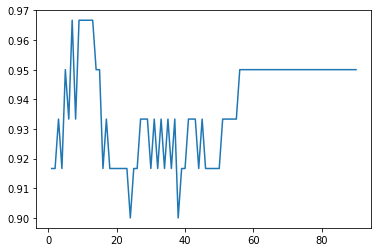

In [15]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

FEATURES:
 [[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 

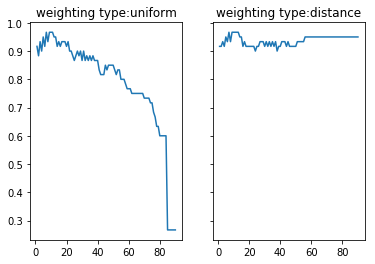

In [10]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

print("FEATURES:\n",X_train)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

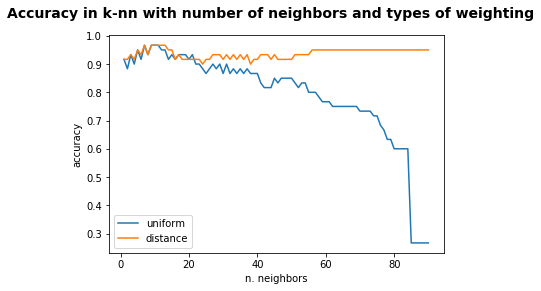

In [11]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


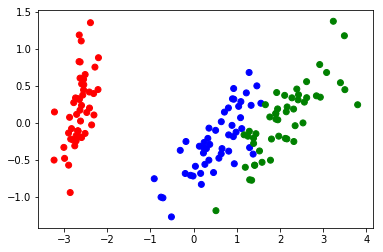

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.decomposition import IncrementalPCA

iris = datasets.load_iris()

transformer = IncrementalPCA(n_components=2)

X = transformer.fit_transform(iris.data)

Y = iris.target

y=[]

for i in Y:
    if i == 0:
        y.append("red")
    elif i== 1:
        y.append("blue")
    else:
        y.append("green")

plt.scatter(X[:,0], X[:,1], c=y)

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


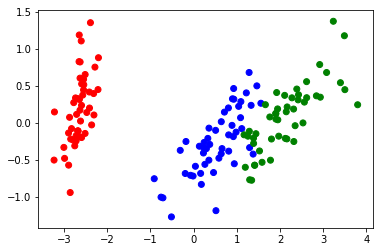

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.decomposition import IncrementalPCA

n_neighbors = 4

iris = datasets.load_iris()

transformer = IncrementalPCA(n_components=2)

X = transformer.fit_transform(iris.data)

#X = iris.data[:, :2]
Y = iris.target

clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(X, Y)

predicted=[]

for i in range(len(Y)):
    instance=(X[i,:]).reshape(1, -1)    
    predicted.append(clf_knn.predict(instance)[0])

y = []
    
for i in predicted:
    if i == 0:
        y.append("red")
    elif i== 1:
        y.append("blue")
    else:
        y.append("green")
        
plt.scatter(X[:,0], X[:,1], c=y)

In the following, extend the above exercize on k-nn using a kernel function for the distances computation. Use a Gaussian kernel, centered around the data point, with a standard deviation sigma that must be tuned to the best value.

In [2]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score 
import numpy as np
import math

n_neighbors = 7

iris = datasets.load_iris()

def kernel_distance(X, Y=None, gamma=None):
    K=np.sqrt(n_neighbors*gaussian_kernel(X, X, gamma)-2*n_neighbors*gaussian_kernel(X, Y, gamma)+n_neighbors*gaussian_kernel(Y, Y, gamma))
    return K

def gaussian_kernel(X, Y, gamma=None):
    return np.exp(-(np.linalg.norm(X-Y)**2)/(2*gamma**2))

def means(data, n):
    Means = np.zeros(n)
    
    for j in range (0,n):
        for i in range (0, len(data)):
            Means[j] += data[i][j]
            
    return Means/len(data)

def standard_deviation(data):
    n = data.shape[1]
    Means = means(data, n)
    sdtv = np.zeros(n)
    
    print("Means ",Means)
    
    for j in range (0, n):
        for i in range (0, len(data)):
            sdtv[j] += (data[i][j]-Means[j])**2
    
    sdtv = np.sqrt(sdtv / (len(data)-1))
    
    print("sdtv ", sdtv)
    
    return np.sum(sdtv)/n
    
            

gamma = standard_deviation(iris.data)
hit = 0
miss = 0

print("Gamma:",gamma)
#deviazione standard campionaria


clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric=kernel_distance, metric_params={"gamma":gamma})
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
    
# shows the model predictions  
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted=clf_knn.predict(instance)[0]
    if iris.target[i]==predicted:
        hit+=1
    else:
        miss+=1

print("Classified:{} Missclassified: {}".format(hit, miss))
        

Means  [5.84333333 3.054      3.75866667 1.19866667]
sdtv  [0.82806613 0.43359431 1.76442042 0.76316074]
Gamma: 0.9473104002482848
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Classified:150 Missclassified: 0
